In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import math

## Helper Functions

In [69]:
# Plot multiple images
def plot_images(images, titles, main_title):
    
    # Determine dimensions for subplot array
    x = math.ceil(len(images)/2)
    y = 3
    
    # Iterate through each image
    for i in range(len(images)):
        fig = plt.subplot(x, y, i + 1)
        
        # Remove axes
        plt.axis("off")
        
        # Plot formatting
        plt.subplots_adjust(top=0.98)
        plt.title(titles[i])
        fig = plt.gcf()
        fig.set_size_inches(10,10)
        plt.imshow(images[i], cmap="gray")
        
    #plt.suptitle(main_title, fontsize=16)

## Part 1: Marr-Hildreth Edge Detector
Write a function in Python that applies the Marr-Hildreth algorithm to detect the
edges. Test the function on the building.tif and septagon.tif images with
different (1) thresholds, (2) Gaussian kernel size, (3) standard deviations, and
(4) Laplacian kernel size.

Steps:
1. Filter the input image with an nxn Gaussian lowpass kernel
2. Compute Laplacian of the image resulting from Step 1
3. Find the zero-crossings of the image from Step 2


In [98]:
building = cv2.imread("../data/lab07/building.tif")
building = cv2.cvtColor(building, cv2.COLOR_BGR2GRAY)
septagon = cv2.imread("../data/lab07/septagon.tif")
septagon = cv2.cvtColor(septagon, cv2.COLOR_BGR2GRAY)

(-0.5, 813.5, 650.5, -0.5)

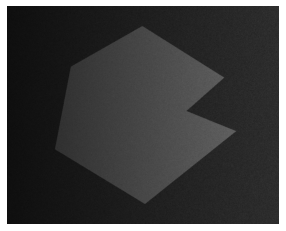

In [96]:
plt.imshow(septagon)
plt.axis("off")

In [108]:
def marrHildreth(img, g = 5, l = 5, sigma = 6, t = 0):
    '''
    img: np array
    g: Gaussian kernel size
    l: Laplacian kernel size
    sigma: standard deviation
    t: threshold for zero-crossing detection
    result: binary image showing crossings (return)
    '''
    print(str(img))
    result = np.zeros(img.shape)

    # Filter with gxg Gaussian kernel
    gimg = cv2.GaussianBlur(img, (g, g), 0)

    # Apply the Laplacian operator to the image
    lap = cv2.Laplacian(gimg, cv2.CV_64F)

    # Set threshold
    lap_max = np.max(lap)
    t = 0.4*lap_max

    # Check for zero crossings
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            neg = 0
            pos = 0

            # Save nearby pixel neighbors
            neighbors = [img[i+1, j-1], img[i+1, j], img[i+1, j+1], img[i, j-1], img[i, j+1], img[i-1, j-1], img[i-1, j], img[i-1, j+1]]

            # Save max and min neighbors to find differences
            _max = np.max(neighbors)
            _min = np.min(neighbors)

            # Compare g(x,y) (n) against threshold (t)
            for n in neighbors:
                diff = np.abs(img[i, j] - n)
                if(diff < t):
                    result[i, j] = img[i, j]
                elif(diff >= t):
                    result[i, j] = 0

    # Normalize the result
    result_norm = np.uint8(result/result.max()*255)

    return lap

[[230 231 230 ... 230 228 227]
 [228 228 228 ... 231 231 231]
 [227 227 225 ... 230 230 228]
 ...
 [ 56  62  55 ... 133 115 111]
 [ 54  50  47 ... 152 129 126]
 [ 38  27  34 ... 161 142 140]]


C:\Users\Bridget\AppData\Local\Temp/ipykernel_9092/3787444892.py:33: RuntimeWarning: overflow encountered in scalar subtract
  diff = np.abs(img[i, j] - n)


[[230 231 230 ... 230 228 227]
 [228 228 228 ... 231 231 231]
 [227 227 225 ... 230 230 228]
 ...
 [ 56  62  55 ... 133 115 111]
 [ 54  50  47 ... 152 129 126]
 [ 38  27  34 ... 161 142 140]]


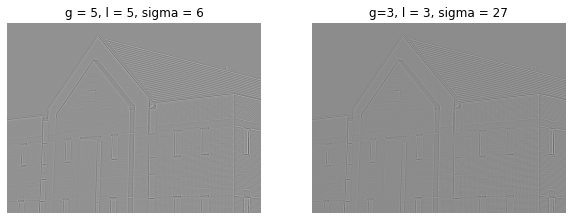

In [65]:
mh1 = marrHildreth(building)
mh2 = marrHildreth(building, 3, 3, 27, 5)
mh3 = marrHildreth(building, 5, 25, 4, 0)

In [109]:
mhs1 = marrHildreth(septagon)
mhs2 = marrHildreth(septagon, 3, 3, 1.2, 5)
mhs3 = marrHildreth(septagon, 5, 25, 3, 0)

[[15 10 19 ... 55 47 46]
 [14 13 16 ... 56 55 41]
 [16 20 18 ... 33 51 49]
 ...
 [16 16 14 ... 51 47 47]
 [19 17 14 ... 36 43 49]
 [18 13 14 ... 49 46 34]]


C:\Users\Bridget\AppData\Local\Temp/ipykernel_9092/2882548383.py:38: RuntimeWarning: overflow encountered in scalar subtract
  diff = np.abs(img[i, j] - n)


[[15 10 19 ... 55 47 46]
 [14 13 16 ... 56 55 41]
 [16 20 18 ... 33 51 49]
 ...
 [16 16 14 ... 51 47 47]
 [19 17 14 ... 36 43 49]
 [18 13 14 ... 49 46 34]]
[[15 10 19 ... 55 47 46]
 [14 13 16 ... 56 55 41]
 [16 20 18 ... 33 51 49]
 ...
 [16 16 14 ... 51 47 47]
 [19 17 14 ... 36 43 49]
 [18 13 14 ... 49 46 34]]


In [85]:
mhs_images = [mhs1, mhs2, mhs3]
mhs_titles = ["g = 5, l = 5, sigma = 6, t = 0", "g=3, l = 3, sigma = 27, t = 5", "g = 5, l = 25, sigma = 4, t = 0"]

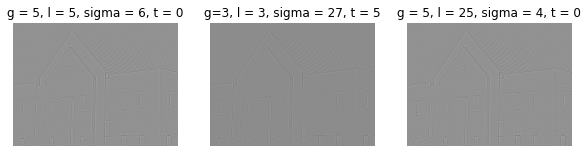

In [70]:
mh_images = [mh1, mh2, mh3]
mh_titles = ["g = 5, l = 5, sigma = 6, t = 0", "g=3, l = 3, sigma = 27, t = 5", "g = 5, l = 25, sigma = 4, t = 0"]
plot_images(mh_images, mh_titles, "Marr Hildreth Algorithm Results")

Text(0.5, 1.0, 'g=3, l = 3, sigma = 27, t = 5')

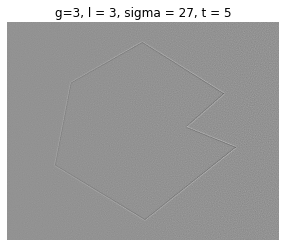

In [110]:
plt.imshow(mhs_images[1], cmap="gray")
plt.axis("off")
plt.title(mhs_titles[1])

## Project  2: Canny Edge Detection
Steps:
1. Gaussian Smoothing
2. Apply 1st derivative edge detector: find gradient magnitude and direction
3. Non-Maxima Suppression
4. Thresholding
5. Edge Tracking

In [128]:
# Building
bc1 = cv2.Canny(building, 100, 200)
# Septagon
sc1 = cv2.Canny(septagon, 100, 200)

(-0.5, 1113.5, 833.5, -0.5)

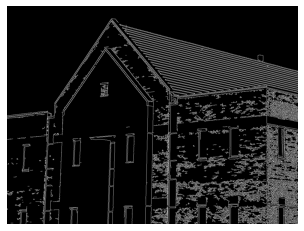

In [127]:
plt.imshow(bc1, cmap="gray")
plt.axis("off")

(-0.5, 813.5, 650.5, -0.5)

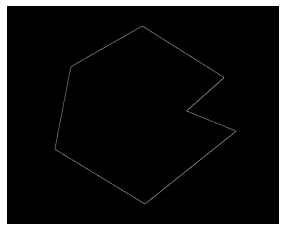

In [129]:
plt.imshow(sc1, cmap="gray")
plt.axis("off")